### Imports et initialisation:

In [24]:
from stahl_model import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.style.use('seaborn-v0_8')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
np.random.seed(42)
Y_0 = np.random.uniform(0, 1, size=(N, Nb_preferences2))
Y_0 = Y_0 / Y_0.sum()  # Decrit la demographie initiale: Y[n, k] est la proportion d'individus de niveau
                       # d'intelligence n et ayant le la preference secondaire k.

### Figure 1: Coexistence des Niveaux d'Intelligence (Scénario sans coût)

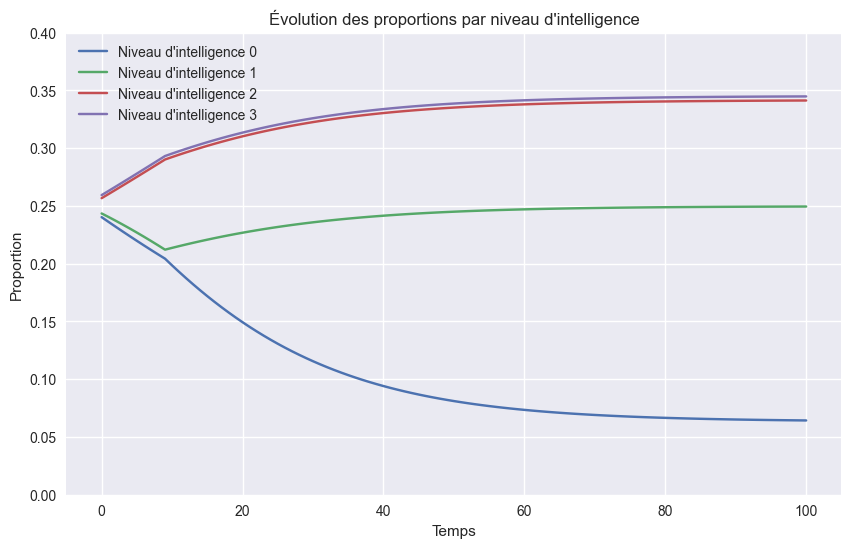

In [26]:
history_Y, _ = run_simulation(M, Y_0, T=100, nu=0.01)

plt.figure(figsize=(10, 6))
for n in range(N):
    proportions_n = [np.sum(Y_t[n, :]) for Y_t in history_Y]
    plt.plot(proportions_n, label=f'Niveau d\'intelligence {n}')
plt.xlabel('Temps')
plt.ylabel('Proportion')
plt.title('Évolution des proportions par niveau d\'intelligence')
plt.legend()
plt.ylim(0, 0.4)
plt.savefig('figures/figure1.png')
plt.show()

### Figure 2: Dynamique des Stratégies et Élimination de l'Irrationnel

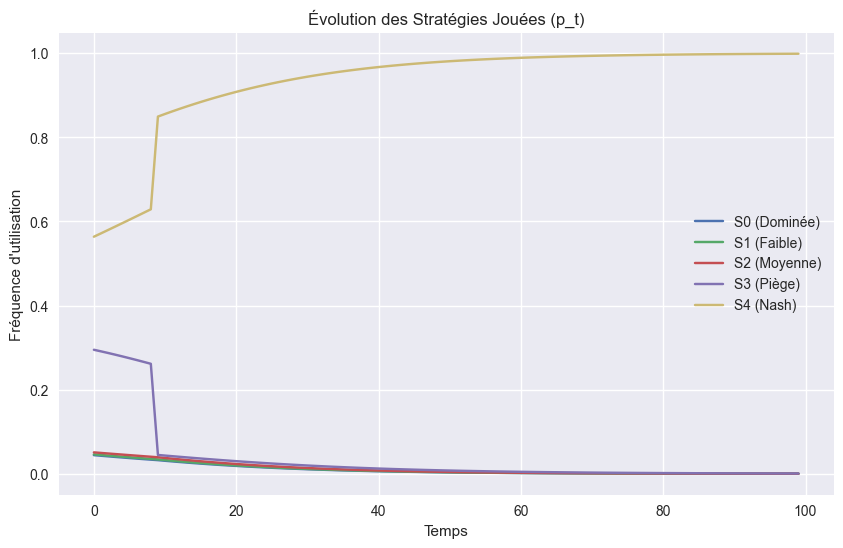

In [27]:
_, history_p = run_simulation(M, Y_0, T=100, nu=0.01)

hist_p_array = np.array(history_p) # Taille (T+1, 5)
plt.figure(figsize=(10, 6))
strategies_names = ["S0 (Dominée)", "S1 (Faible)", "S2 (Moyenne)", "S3 (Piège)", "S4 (Nash)"]
for i in range(5):
    plt.plot(hist_p_array[:, i], label=strategies_names[i])
plt.title("Évolution des Stratégies Jouées (p_t)")
plt.xlabel("Temps")
plt.ylabel("Fréquence d'utilisation")
plt.legend()
plt.savefig('figures/figure2.png')
plt.show()


### Figure 3: L'ascension et la Chute de l'intelligence (scénario avvec cout)

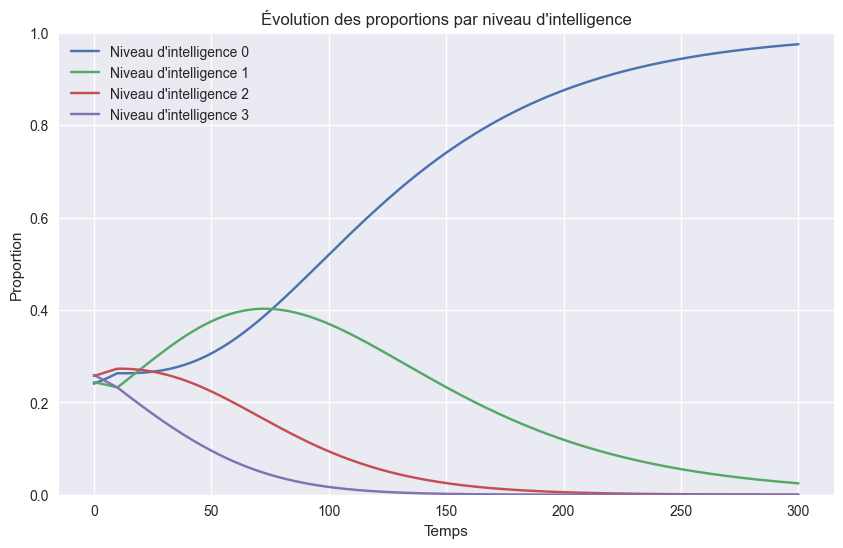

In [28]:
cout_intelligence = np.linspace(0, 5, N)  
history_Y, _ = run_simulation(M, Y_0, T=300, nu=0.01, cout_intelligence=cout_intelligence)

plt.figure(figsize=(10, 6))
for n in range(N):
    proportions_n = [np.sum(Y_t[n, :]) for Y_t in history_Y]
    plt.plot(proportions_n, label=f'Niveau d\'intelligence {n}')
plt.xlabel('Temps')
plt.ylabel('Proportion')
plt.title('Évolution des proportions par niveau d\'intelligence')
plt.legend()
plt.ylim(0, 1)
plt.savefig('figures/figure3.png')
plt.show()